In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
import librosa
import matplotlib.pyplot as plt
import librosa
import numpy as np
from f0_analysis_utils import *

In [14]:
# this file is a perfect continuous segment
file = "samples/audio/ACDC - Back In Black (ver 4 by GuitarManiac09)_Angus Young_3_8s.wav"
y, sr = librosa.load(file, sr=None)
f0, _, _ = librosa.pyin(
    y,
    fmin=librosa.note_to_hz("C2"),
    fmax=librosa.note_to_hz("G6"),
    sr=sr,
    center=False,
)
times = librosa.times_like(f0, sr=sr, hop_length=512, n_fft=2048)
# convert F0 sequence to MIDI note sequence
notes = librosa.hz_to_midi(f0)

In [4]:
segments = get_continous_f0_segments(notes) # this specific file has only one segment
segment = segments[0]
valid_note_events = get_note_events_from_f0_segment(notes, segment, dur_thres=80)
note_events = get_note_events_from_f0_segment(notes, segment, dur_thres=0)

Text(0, 0.5, 'MIDI note numbers')

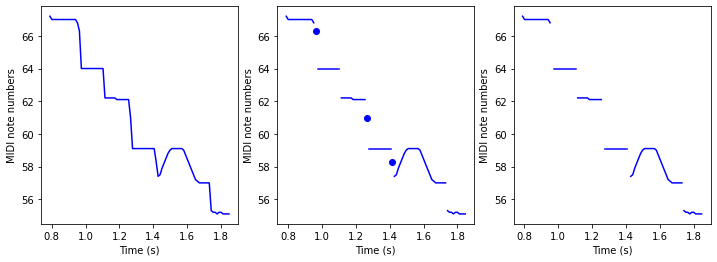

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
# fig.suptitle('Horizontally stacked subplots')
ax1.plot(times[segment], notes[segment], color='b')
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("MIDI note numbers")

for note_event in note_events:
    if note_event not in valid_note_events:
        ax2.plot(times[note_event], notes[note_event], color='b', marker='o')
    else:
        ax2.plot(times[note_event], notes[note_event], color='b')
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("MIDI note numbers")

for valid_note_event in valid_note_events:
    ax3.plot(times[valid_note_event], notes[valid_note_event], color='b')
ax3.set_xlabel("Time (s)")
ax3.set_ylabel("MIDI note numbers")

Text(0, 0.5, 'Amplitude')

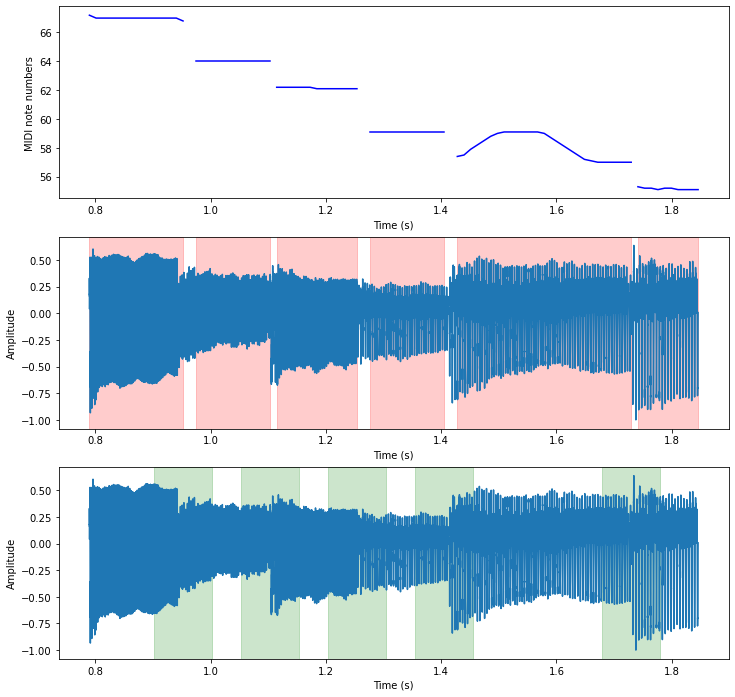

In [6]:
y = y/max(abs(y))
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12))

for valid_note_event in valid_note_events:
    ax1.plot(times[valid_note_event], notes[valid_note_event], color='b')
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("MIDI note numbers")

start_time = times[valid_note_events[0][0]]
end_time = times[valid_note_events[-1][-1]]
x = librosa.times_like(y, sr=44100, hop_length=1)
ax2.plot(x[int(start_time*sr):int(end_time*sr)], y[int(start_time*sr):int(end_time*sr)])
for valid_note_event in valid_note_events:
    ax2.axvspan(times[valid_note_event][0], times[valid_note_event][-1], color='r', alpha=0.2)
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Amplitude")

ax3.plot(x[int(start_time*sr):int(end_time*sr)], y[int(start_time*sr):int(end_time*sr)])
for valid_note_event in valid_note_events[:-1]:
    note_event_end = times[valid_note_event][-1]
    transition_start = note_event_end - 0.05
    transition_end = note_event_end + 0.05
    ax3.axvspan(transition_start, transition_end, color='g', alpha=0.2)
ax3.set_xlabel("Time (s)")
ax3.set_ylabel("Amplitude")

In [19]:
file = "samples/audio/ACDC - Back In Black (ver 4 by GuitarManiac09)_Angus Young_3_8s.wav"
y, sr = librosa.load(file, sr=None)
onsets = librosa.onset.onset_detect(y=y, sr=sr, units='time')

Text(0, 0.5, 'Amplitude')

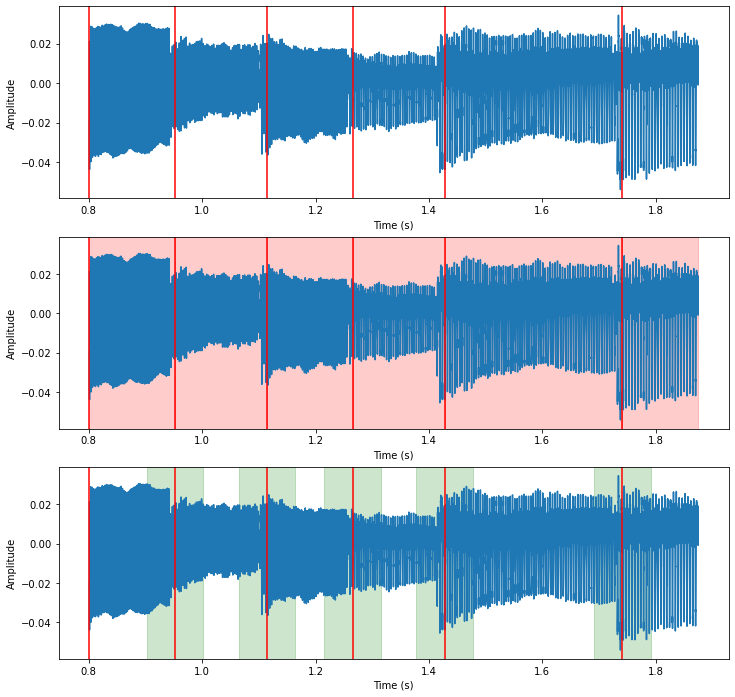

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12))

start_time = onsets[0]
x = librosa.times_like(y, sr=44100, hop_length=1)
ax1.plot(x[int(start_time*sr):], y[int(start_time*sr):])
for onset in onsets:
    ax1.axvline(x=onset, color='r')
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Amplitude")

ax2.plot(x[int(start_time*sr):], y[int(start_time*sr):])
for onset in onsets:
    ax2.axvline(x=onset, color='r')
last_onset = onsets[0]
for onset in onsets[1:]:
    ax2.axvspan(last_onset, onset, color='r', alpha=0.2)
    last_onset = onset
ax2.axvspan(onsets[-1], x[-1], color='r', alpha=0.2)
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Amplitude")

ax3.plot(x[int(start_time*sr):], y[int(start_time*sr):])
for onset in onsets:
    ax3.axvline(x=onset, color='r')
for onset in onsets[1:]:
    transition_start = onset - 0.05
    transition_end = onset + 0.05
    ax3.axvspan(transition_start, transition_end, color='g', alpha=0.2)
ax3.set_xlabel("Time (s)")
ax3.set_ylabel("Amplitude")

## example for diagram

In [5]:
file = "thesis_imgs/example_for_diagram.wav"
y, sr = librosa.load(file, sr=None)
onsets = librosa.onset.onset_detect(y=y, sr=sr, units='time')

Text(0, 0.5, 'Amplitude')

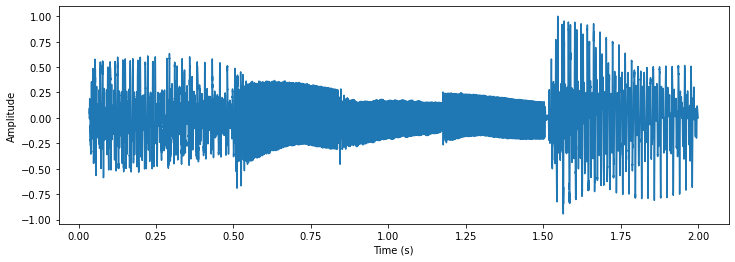

In [11]:
y = y/max(abs(y))
start_time = onsets[0]
x = librosa.times_like(y, sr=44100, hop_length=1)

plt.figure(figsize=(12,4))

plt.plot(x[int(start_time*sr):], y[int(start_time*sr):])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

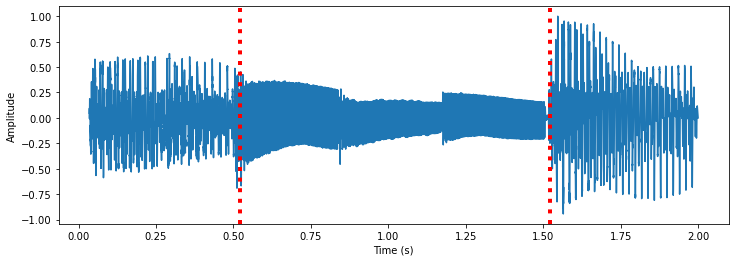

In [20]:
plt.figure(figsize=(12,4))
plt.plot(x[int(start_time*sr):], y[int(start_time*sr):])

plt.axvline(x=onsets[2], color='r', ls=':', lw=4)
plt.axvline(x=onsets[-1], color='r', ls=':', lw=4)

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

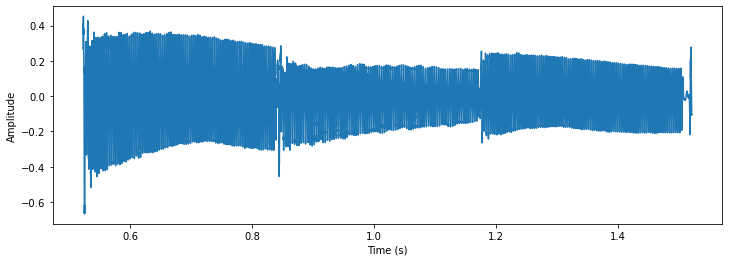

In [23]:
plt.figure(figsize=(12,4))
plt.plot(x[int(onsets[2]*sr):int(onsets[-1]*sr)], y[int(onsets[2]*sr):int(onsets[-1]*sr)])

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

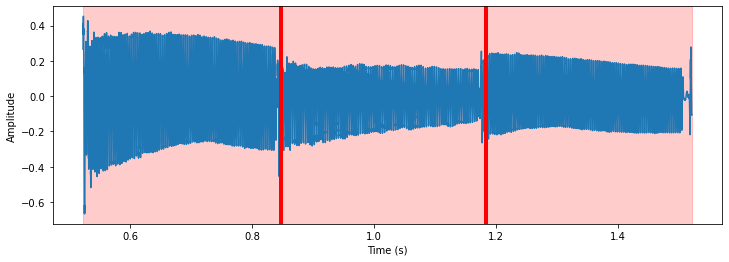

In [26]:
plt.figure(figsize=(12,4))
plt.plot(x[int(onsets[2]*sr):int(onsets[-1]*sr)], y[int(onsets[2]*sr):int(onsets[-1]*sr)])

plt.axvline(x=onsets[3], color='r', lw=4)
plt.axvline(x=onsets[4], color='r', lw=4)

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.axvspan(onsets[2], onsets[3], color='r', alpha=0.2)
plt.axvspan(onsets[3], onsets[4], color='r', alpha=0.2)
plt.axvspan(onsets[4], onsets[5], color='r', alpha=0.2)

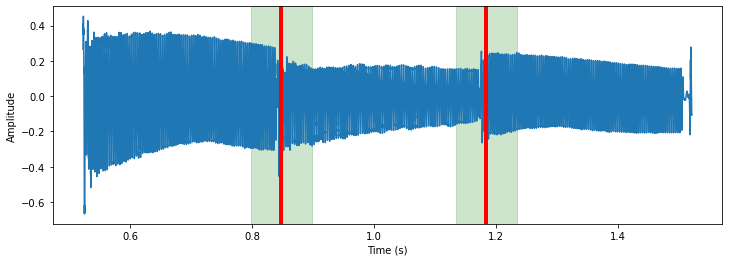

In [27]:
plt.figure(figsize=(12,4))
plt.plot(x[int(onsets[2]*sr):int(onsets[-1]*sr)], y[int(onsets[2]*sr):int(onsets[-1]*sr)])

plt.axvline(x=onsets[3], color='r', lw=4)
plt.axvline(x=onsets[4], color='r', lw=4)

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.axvspan(onsets[3]-0.05, onsets[3]+0.05, color='g', alpha=0.2)
plt.axvspan(onsets[4]-0.05, onsets[4]+0.05, color='g', alpha=0.2)

Text(0, 0.5, 'Amplitude')

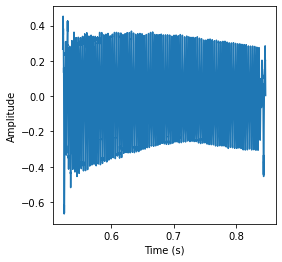

In [28]:
plt.figure(figsize=(4,4))
plt.plot(x[int(onsets[2]*sr):int(onsets[3]*sr)], y[int(onsets[2]*sr):int(onsets[3]*sr)])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

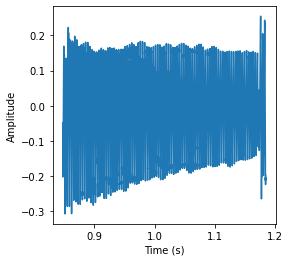

In [29]:
plt.figure(figsize=(4,4))
plt.plot(x[int(onsets[3]*sr):int(onsets[4]*sr)], y[int(onsets[3]*sr):int(onsets[4]*sr)])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

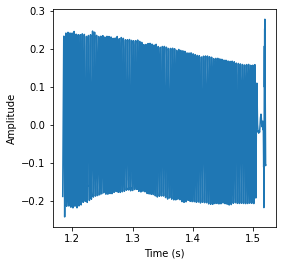

In [30]:
plt.figure(figsize=(4,4))
plt.plot(x[int(onsets[4]*sr):int(onsets[5]*sr)], y[int(onsets[4]*sr):int(onsets[5]*sr)])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

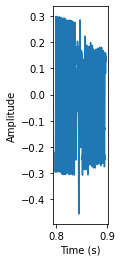

In [35]:
plt.figure(figsize=(1,4))
plt.plot(x[int((onsets[3]-0.05)*sr):int((onsets[3]+0.05)*sr)], y[int((onsets[3]-0.05)*sr):int((onsets[3]+0.05)*sr)])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

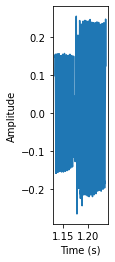

In [34]:
plt.figure(figsize=(1,4))
plt.plot(x[int((onsets[4]-0.05)*sr):int((onsets[4]+0.05)*sr)], y[int((onsets[4]-0.05)*sr):int((onsets[4]+0.05)*sr)])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

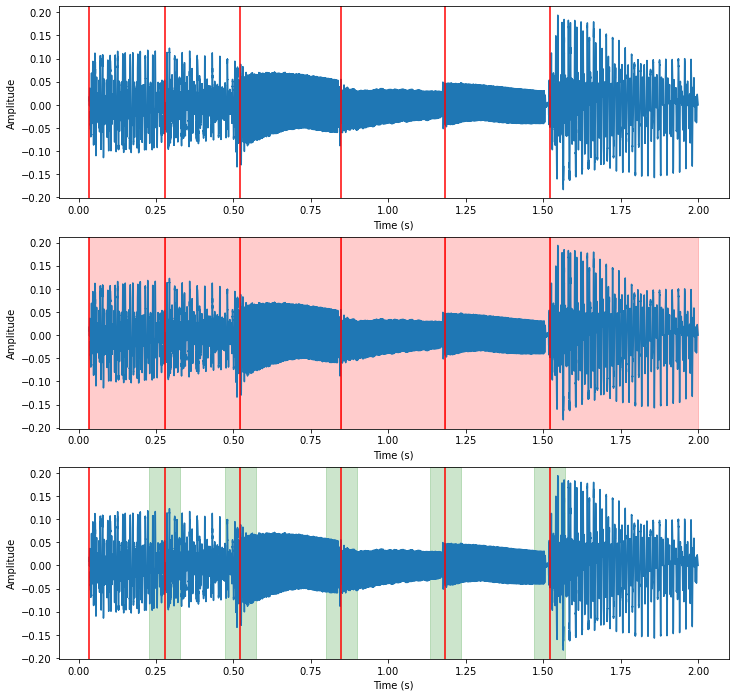

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12))

y = y/max(abs(y))
start_time = onsets[0]
x = librosa.times_like(y, sr=44100, hop_length=1)
ax1.plot(x[int(start_time*sr):], y[int(start_time*sr):])
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Amplitude")

ax2.plot(x[int(start_time*sr):], y[int(start_time*sr):])
for onset in onsets:
    ax2.axvline(x=onset, color='r')
last_onset = onsets[0]
for onset in onsets[1:]:
    ax2.axvspan(last_onset, onset, color='r', alpha=0.2)
    last_onset = onset
ax2.axvspan(onsets[-1], x[-1], color='r', alpha=0.2)
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Amplitude")

ax3.plot(x[int(start_time*sr):], y[int(start_time*sr):])
for onset in onsets:
    ax3.axvline(x=onset, color='r')
for onset in onsets[1:]:
    transition_start = onset - 0.05
    transition_end = onset + 0.05
    ax3.axvspan(transition_start, transition_end, color='g', alpha=0.2)
ax3.set_xlabel("Time (s)")
ax3.set_ylabel("Amplitude")